# Анализ ультрамарафонов

### Импортируем необходимые библиотеки

In [45]:
import pandas as pd
import seaborn as sns

### Читаем датасет

In [48]:
df = pd.read_csv("TWO_CENTURIES_OF_UM_RACES.csv")

/tmp/ipykernel_160/2350612576.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("TWO_CENTURIES_OF_UM_RACES.csv")


In [50]:
df.head(5)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4


In [52]:
df.shape

(7461195, 13)

In [54]:
df.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete club                  object
Athlete country               object
Athlete year of birth        float64
Athlete gender                object
Athlete age category          object
Athlete average speed         object
Athlete ID                     int64
dtype: object

### Очищаем данные

##### Рассмотрим только австралийские марафоны на 50км, прошедшие в 2019 году

In [58]:
df2 = df[(df['Event distance/length'].isin(['50km'])) & (df['Year of event'] == 2019) & (df['Event name'].str.split('(').str.get(1).str.split(')').str.get(0) == 'AUS')]

In [60]:
df2.shape

(5832, 13)

##### Уберем (AUS) из названия мероприятия

In [63]:
df2['Event name'] = df2['Event name'].str.split('(').str.get(0)
df2.head(10)

/tmp/ipykernel_160/3309085592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Event name'] = df2['Event name'].str.split('(').str.get(0)


,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
1814909,2019,02.-03.03.2019,Lark Hill 50K Dusk to Dawn Ultra,50km,21,3:59:17 h,NaN,AUS,1978.0,M,M40,12.537,31498
1814910,2019,02.-03.03.2019,Lark Hill 50K Dusk to Dawn Ultra,50km,21,4:42:15 h,NaN,AUS,1977.0,M,M40,10.629,304316
1814911,2019,02.-03.03.2019,Lark Hill 50K Dusk to Dawn Ultra,50km,21,4:44:55 h,NaN,AUS,1985.0,M,M23,10.529,648871
1814912,2019,02.-03.03.2019,Lark Hill 50K Dusk to Dawn Ultra,50km,21,4:45:29 h,NaN,AUS,1969.0,M,M45,10.508,31502
1814913,2019,02.-03.03.2019,Lark Hill 50K Dusk to Dawn Ultra,50km,21,4:55:13 h,NaN,AUS,1983.0,M,M35,10.162,84675
1814914,2019,02.-03.03.2019,Lark Hill 50K Dusk to Dawn Ultra,50km,21,5:05:00 h,NaN,AUS,1973.0,M,M45,9.836,31494
1814915,2019,02.-03.03.2019,Lark Hill 50K Dusk to Dawn Ultra,50km,21,5:05:27 h,NaN,AUS,1979.0,F,W35,9.822,203099
1814916,2019,02.-03.03.2019,Lark Hill 50K Dusk to Dawn Ultra,50km,21,5:15:43 h,NaN,AUS,NaN,M,NaN,9.502,586326
1814917,2019,02.-03.03.2019,Lark Hill 50K Dusk to Dawn Ultra,50km,21,5:51:23 h,NaN,AUS,1961.0,M,M55,8.538,31504
1814918,2019,02.-03.03.2019,Lark Hill 50K Dusk to Dawn Ultra,50km,21,5:52:00 h,NaN,AUS,1974.0,M,M40,8.523,31512


##### Добавим возраст атлета

In [66]:
df2['athlete_age'] = 2019 - df2['Athlete year of birth']

/tmp/ipykernel_160/3465089594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['athlete_age'] = 2019 - df2['Athlete year of birth']


##### Уберем h из времени забега 

In [69]:
df2['Athlete performance'] = df2['Athlete performance'].str.split(' ').str.get(0)

/tmp/ipykernel_160/2477507555.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Athlete performance'] = df2['Athlete performance'].str.split(' ').str.get(0)


In [71]:
df2.head(2)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,athlete_age
1814909,2019,02.-03.03.2019,Lark Hill 50K Dusk to Dawn Ultra,50km,21,3:59:17,NaN,AUS,1978.0,M,M40,12.537,31498,41.0
1814910,2019,02.-03.03.2019,Lark Hill 50K Dusk to Dawn Ultra,50km,21,4:42:15,NaN,AUS,1977.0,M,M40,10.629,304316,42.0


##### Отбросим столбцы с клубом, страной, годом рождения атлета и его возрастной категорией

In [74]:
df2 = df2.drop(['Athlete club','Athlete country', 'Athlete year of birth', 'Athlete age category', 'Year of event'], axis = 1)

In [76]:
df2.head(3)

,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age
1814909,02.-03.03.2019,Lark Hill 50K Dusk to Dawn Ultra,50km,21,3:59:17,M,12.537,31498,41.0
1814910,02.-03.03.2019,Lark Hill 50K Dusk to Dawn Ultra,50km,21,4:42:15,M,10.629,304316,42.0
1814911,02.-03.03.2019,Lark Hill 50K Dusk to Dawn Ultra,50km,21,4:44:55,M,10.529,648871,34.0


##### Избавляемся от null значений

In [79]:
df2.isna().sum()

Event dates                    0
Event name                     0
Event distance/length          0
Event number of finishers      0
Athlete performance            0
Athlete gender                 0
Athlete average speed          0
Athlete ID                     0
athlete_age                  646
dtype: int64

In [81]:
df2 = df2.dropna()

##### Проверяем дубликаты 

In [84]:
df2[df2.duplicated() == True]

,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age


##### Обновляем индексы

In [87]:
df2.reset_index(drop = True)

,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age
0,02.-03.03.2019,Lark Hill 50K Dusk to Dawn Ultra,50km,21,3:59:17,M,12.537,31498,41.0
1,02.-03.03.2019,Lark Hill 50K Dusk to Dawn Ultra,50km,21,4:42:15,M,10.629,304316,42.0
2,02.-03.03.2019,Lark Hill 50K Dusk to Dawn Ultra,50km,21,4:44:55,M,10.529,648871,34.0
3,02.-03.03.2019,Lark Hill 50K Dusk to Dawn Ultra,50km,21,4:45:29,M,10.508,31502,50.0
4,02.-03.03.2019,Lark Hill 50K Dusk to Dawn Ultra,50km,21,4:55:13,M,10.162,84675,36.0
...,...,...,...,...,...,...,...,...,...
5181,09.11.2019,Upstream Challenge,50km,153,9:33:05,M,5.235,807067,49.0
5182,09.11.2019,Upstream Challenge,50km,153,9:52:10,M,5.066,807081,48.0
5183,09.11.2019,Upstream Challenge,50km,153,9:53:00,M,5.059,127074,30.0
5184,09.11.2019,Upstream Challenge,50km,153,9:55:06,M,5.041,249012,43.0


In [89]:
df2['athlete_age']= df2['athlete_age'].astype(int)

In [91]:
df2.head(2)

,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age
1814909,02.-03.03.2019,Lark Hill 50K Dusk to Dawn Ultra,50km,21,3:59:17,M,12.537,31498,41
1814910,02.-03.03.2019,Lark Hill 50K Dusk to Dawn Ultra,50km,21,4:42:15,M,10.629,304316,42


In [93]:
df2['Athlete average speed']= df2['Athlete average speed'].astype(float)

In [95]:
df2.dtypes

Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete gender                object
Athlete average speed        float64
Athlete ID                     int64
athlete_age                    int64
dtype: object

##### Переименовываем столбцы

In [101]:
df3 = df2.rename(columns = {'Event dates' : 'race_day', 
                            'Event name' : 'race_name', 
                            'Event distance/length' : 'race_length',
                            'Event number of finishers' : 'number_of_finishers',
                            'Athlete performance' : 'athlete_perfomance',
                            'Athlete gender' : 'athlete_gender',
                            'Athlete average speed' : 'average_speed',
                            'Athlete ID' : 'athlete_id'
                           })



    


In [103]:
df4 = df3.reset_index(drop = True)
df4

,race_day,race_name,race_length,number_of_finishers,athlete_perfomance,athlete_gender,average_speed,athlete_id,athlete_age
0,02.-03.03.2019,Lark Hill 50K Dusk to Dawn Ultra,50km,21,3:59:17,M,12.537,31498,41
1,02.-03.03.2019,Lark Hill 50K Dusk to Dawn Ultra,50km,21,4:42:15,M,10.629,304316,42
2,02.-03.03.2019,Lark Hill 50K Dusk to Dawn Ultra,50km,21,4:44:55,M,10.529,648871,34
3,02.-03.03.2019,Lark Hill 50K Dusk to Dawn Ultra,50km,21,4:45:29,M,10.508,31502,50
4,02.-03.03.2019,Lark Hill 50K Dusk to Dawn Ultra,50km,21,4:55:13,M,10.162,84675,36
...,...,...,...,...,...,...,...,...,...
5181,09.11.2019,Upstream Challenge,50km,153,9:33:05,M,5.235,807067,49
5182,09.11.2019,Upstream Challenge,50km,153,9:52:10,M,5.066,807081,48
5183,09.11.2019,Upstream Challenge,50km,153,9:53:00,M,5.059,127074,30
5184,09.11.2019,Upstream Challenge,50km,153,9:55:06,M,5.041,249012,43


### Визуализация

#### Распределение атлетов по полу

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='athlete_gender', ylabel='Count'>

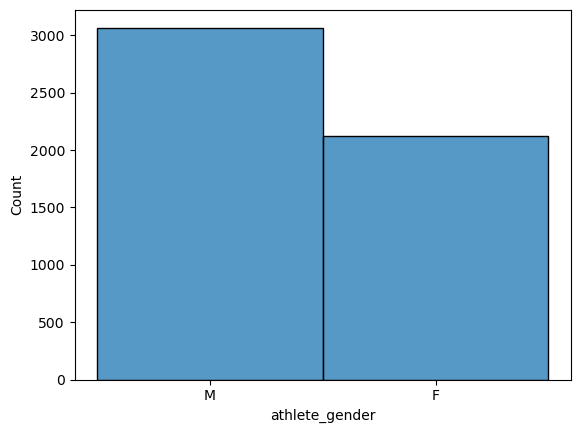

In [107]:
sns.histplot(df4['athlete_gender'])

##### Вывод: большинство участников марафонов мужчины

#### Распределение средних скоростей для мужчин

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


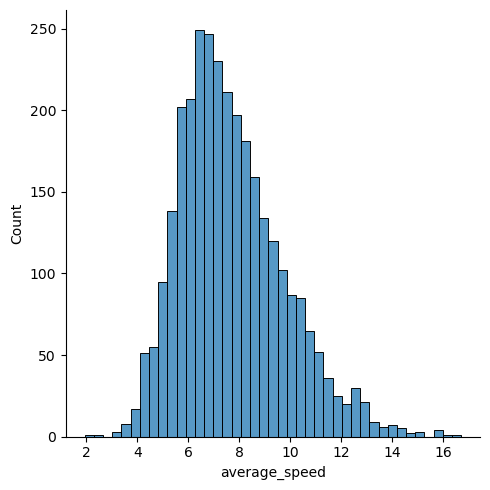

In [110]:
sns.displot(df4[df4['athlete_gender'] == 'M']['average_speed']) 

##### Вывод: средняя скорость большинства мужчин находится в пределах 6-9 км в час

#### Средняя скорость в зависимости от пола

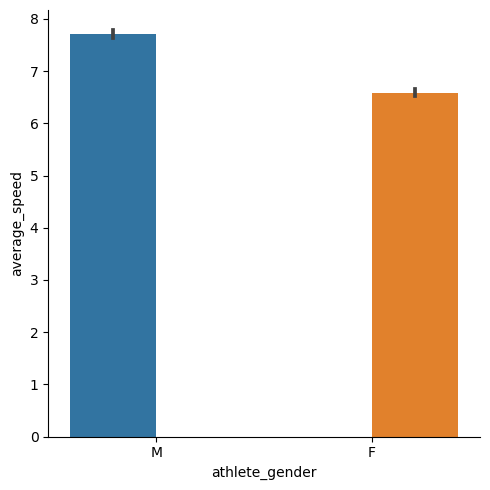

In [113]:
sns.catplot(
    data=df4, kind="bar",
    x="athlete_gender", y="average_speed", hue="athlete_gender",
)

##### Вывод: Средняя скорость мужчин-участников марафона примерно на 1.2 км в час выше скорости женщин-участниц марафона

#### Зависимость средней скорости от возраста + пола

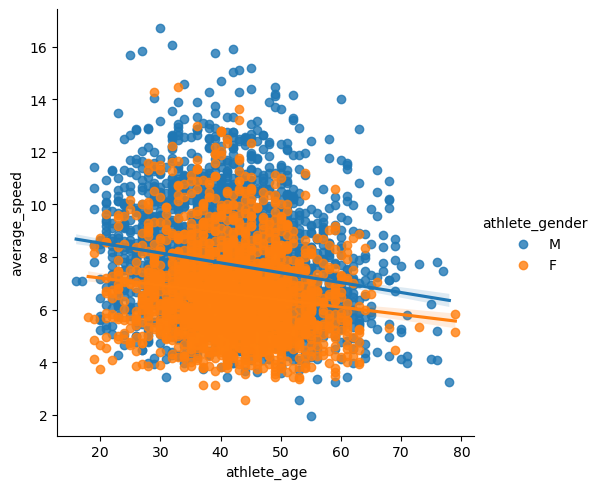

In [116]:
sns.lmplot(data=df4, x = 'athlete_age', y = 'average_speed', hue = 'athlete_gender')

##### Вывод: с возрастом средняя скорость забега снижается

##### Средняя скорость в зависимости от сезона
##### Австралийские сезоны по месяцам: 12-2 лето, 3-5 осень, 6-8 зима, 9-11 весна

In [119]:
#Стандартизируем даты
def standardize_dates(date_str):
    if '-' in date_str:  
        start_date, end_date = date_str.split('-')
        
        month_year = end_date.split('.')[-2:]
        
        start_date = start_date + '.'.join(month_year)
        return start_date, end_date
    else:
        return date_str, None  

df4['event_day'] = df4['race_day'].apply(lambda x: standardize_dates(x)[0])
df4['end_date'] = df4['race_day'].apply(lambda x: standardize_dates(x)[1])

df4.drop(columns=['end_date'], inplace=True)
df4.drop(columns=['race_day'], inplace=True)


In [123]:
df4['race_month'] = df4['event_day'].str.split('.').str.get(1).astype(int)
df4['race_season'] = df4['race_month'].apply(lambda x: 'Summer' if x > 11 else 'Spring' if x > 8 else 'Winter' if x > 5 else 'Fall' if x > 2 else 'Summer')

In [125]:
df4.groupby('race_season')['average_speed'].agg(['mean', 'count']).sort_values('mean', ascending = False)

,mean,count
race_season,,
Summer,9.342601,464
Winter,7.660009,894
Spring,7.227365,1160
Fall,6.748953,2668


##### Вывод: Наибольшая средняя скорость наблюдается во время летних забегов, наименьшая - во время осенних.

##### Однако, количество участников во время летних забегов наименьшее, что может говорить о том, что в них участвуют профессионалы, в то время, как в осенних участвует много любителей